In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
data = pd.read_csv("Dataset\imdb(MOVIES)_processed.csv")
data.head()

,Ranking of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Detail About Movie,Director,Actor1,Actor2,Actor3,Actor4,Votes,Metascore,Gross Collection,Keywords
0,1,Jai Bhim,2021,TV-MA,164,"['Crime', ' Drama']",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,0.0,0.0,"['tribal', 'man', 'arrested', 'case', 'alleged..."
1,2,The Shawshank Redemption,1994,R,142,['Drama'],9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,2834.0,"['two', 'imprisoned', 'men', 'bond', 'number',..."
2,3,The Godfather,1972,R,175,"['Crime', ' Drama']",9.2,The Godfather follows Vito Corleone Don of the...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,13497.0,"['godfather', 'follows', 'vito', 'corleone', '..."
3,4,The Dark Knight,2008,PG-13,152,"['Action', ' Crime', ' Drama']",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,53486.0,"['menace', 'known', 'joker', 'wreaks', 'havoc'..."
4,5,The Godfather: Part II,1974,R,202,"['Crime', ' Drama']",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,5730.0,"['early', 'life', 'career', 'vito', 'corleone'..."


In [3]:
data.isnull().sum()

Ranking of Movie      0
Movie Name            0
Year                  0
Certificate           0
Runtime               0
Genre                 0
Rating                0
Detail About Movie    0
Director              0
Actor1                0
Actor2                0
Actor3                0
Actor4                0
Votes                 0
Metascore             0
Gross Collection      0
Keywords              0
dtype: int64

Text(0.5, 1.0, 'Top 10 Movies per User Ratings')

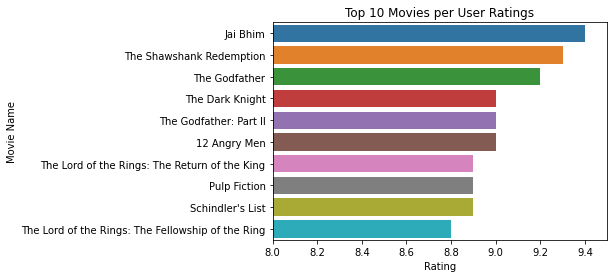

In [4]:
# Top 10 movies per User Rating
top10_per_rating = data[['Movie Name', 'Rating']].sort_values('Rating', ascending=False).head(10)
sns.barplot(x='Rating', y='Movie Name', data=top10_per_rating)
plt.xlim(8, 9.5)
plt.title('Top 10 Movies per User Ratings')

In [5]:
# Correlation Between Year and Runtime
alt.Chart(data).mark_circle(opacity=0.3, color='purple').encode(
    alt.X('Year:Q', scale=alt.Scale(zero=False)),
    y='Runtime:Q',
    tooltip=['Movie Name', 'Ranking of Movie', 'Certificate', 'Genre'], size='Runtime'
).properties(width=1000,height=350).configure_title(fontSize=14).configure(background="lightgrey").interactive()

alt.Chart(...)

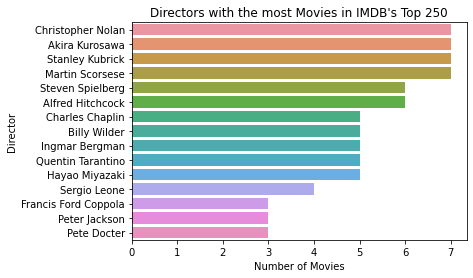

In [6]:
# Actors with the most Movies in IMDB's Top 250
top_directors = data.groupby('Director')['Movie Name'].count().sort_values(ascending=False).head(15)
sns.barplot(x=top_directors, y=top_directors.index)
plt.title('Directors with the most Movies in IMDB\'s Top 250')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [7]:
# Correlation Between Year and Runtime
alt.Chart(data).mark_circle(opacity=0.3, color='blue').encode(
    alt.X('Metascore:Q', scale=alt.Scale(zero=False)),
    alt.Y('Year:Q', scale=alt.Scale(zero=False)),
    tooltip=['Movie Name', 'Ranking of Movie', 'Certificate', 'Genre'], size='Metascore'
).properties(width=650,height=350).configure_title(fontSize=14).configure(background="lightgrey").interactive()

alt.Chart(...)

Text(0, 0.5, 'Number of Movies')

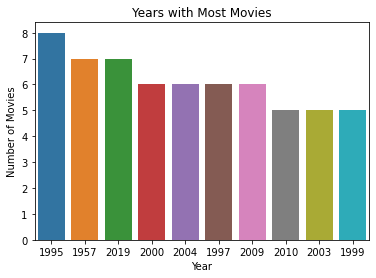

In [8]:
movie_per_year = data.groupby('Year')['Movie Name'].count().sort_values(ascending=False).head(10)
sns.barplot(x=movie_per_year.index, y=movie_per_year, order=movie_per_year.index)
plt.title('Years with Most Movies')
plt.ylabel('Number of Movies')

In [9]:
data['Genre'].value_counts()

['Drama']                              22
['Crime', ' Drama']                    14
['Biography', ' Drama', ' History']     9
['Drama', ' War']                       8
['Crime', ' Drama', ' Mystery']         8
                                       ..
['Animation', ' Drama']                 1
['Drama', ' Mystery', ' Romance']       1
['Biography', ' Comedy', ' Crime']      1
['Drama', ' Fantasy', ' War']           1
['Action', ' Adventure', ' Comedy']     1
Name: Genre, Length: 109, dtype: int64

(4.0, 22.0)

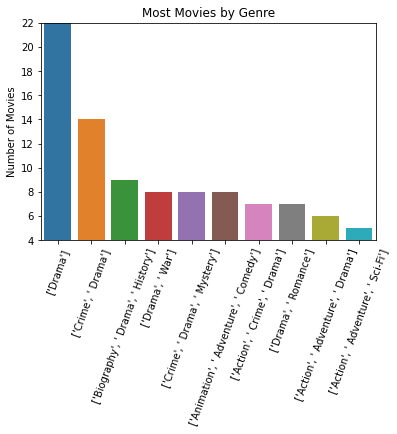

In [10]:
genre_top10 = data['Genre'].value_counts(ascending=False).head(10)
sns.barplot(x=genre_top10.index, y=genre_top10)
plt.title('Most Movies by Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=70)
plt.ylim(4,22)

In [11]:
# Count of Records per Year with Sum of Gross Collection
alt.Chart(data).mark_bar(opacity=0.3, color='blue').encode(
    alt.X('Year:Q', scale=alt.Scale(zero=False)),
    alt.Y('count(Year):Q', scale=alt.Scale(zero=False)),
    tooltip=['count(Year)', 'Year', 'sum(Gross Collection)']
).properties(width=650,height=350).configure_title(fontSize=14).configure(background="lightgrey").interactive()

alt.Chart(...)